In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import vstack, load_npz

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report

%matplotlib inline

In [2]:
labels = np.load('data/labels.npy')

In [3]:
features = load_npz('data/features.npz')

In [4]:
labels

array([ True,  True,  True, ..., False, False, False])

In [5]:
features

<171236x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 18138124 stored elements in Compressed Sparse Row format>

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [7]:
clf = SGDClassifier()

In [8]:
# fit model to training data
clf.fit(X_train, y_train)

SGDClassifier()

In [9]:
# make predictions
predictions = clf.predict(X_test)
predictions

array([False,  True,  True, ...,  True, False, False])

In [10]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.69      0.72      0.70     23022
        True       0.37      0.34      0.36     11226

    accuracy                           0.60     34248
   macro avg       0.53      0.53      0.53     34248
weighted avg       0.59      0.60      0.59     34248



In [11]:
sum(labels) / len(labels)

0.33060220981569294

In [ ]:
%%time

scores = np.zeros((3, 6))
penalty = ['l2', 'l1', 'elasticnet']
alpha = [1e-4, 1e-3, 1e-2, 1e-1, 1]

for i, p in enumerate(penalty):
    for j, a in enumerate(alpha):
        clf = SGDClassifier(alpha=a, penalty=p)
        scores[i, j] = cross_val_score(clf, X_train, y_train, cv=3).mean()

In [ ]:
sns.heatmap(scores[:, :-1], xticklabels=alpha, yticklabels=penalty)

In [ ]:
scores.argmax()

In [ ]:
scores.max()

In [ ]:
# Create model with best performing hyperparameters
clf = SGDClassifier(alpha=1, penalty='elasticnet')

# Fit on all of your (training) data
clf.fit(X_train, y_train)

In [ ]:
# Evaluate on Holdout set
print(clf.score(X_test, y_test))

In [3]:
import ray, logging
from ray import tune

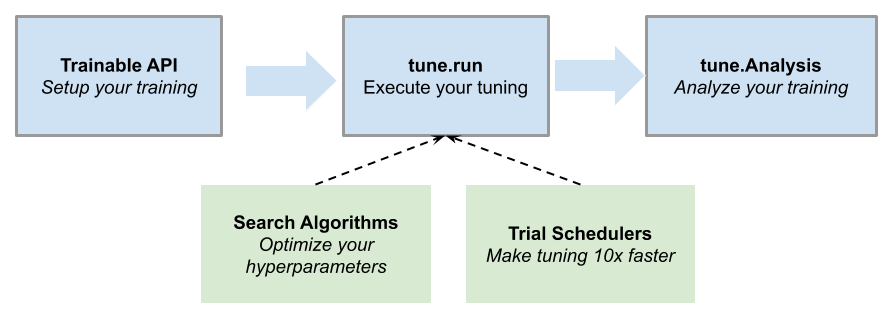

In [4]:
#ray.init( address='auto',num_workers=2)
ray.init(logging_level=logging.ERROR,address='ray://192.168.2.133:10001')

ClientContext(dashboard_url='127.0.0.1:8265', python_version='3.8.10', ray_version='1.12.0', ray_commit='f18fc31c7562990955556899090f8e8656b48d2d', protocol_version='2022-03-16', _num_clients=1, _context_to_restore=<ray.util.client._ClientContext object at 0x7f40c43115e0>)

In [5]:
def train_evaluate(parameterization):
    clf = SGDClassifier(alpha=parameterization['alpha'], penalty=parameterization['penalty'])
    
    tune.report(mean_accuracy=cross_val_score(clf, X_train, y_train, cv=3).mean())

In [ ]:
%%time
search_space = {
    "alpha": tune.loguniform(1e-4, 1),
    "penalty": tune.choice(['l1', 'l2', 'elasticnet'])
}

analysis = tune.run(train_evaluate, config=search_space, num_samples=15, verbose=1)

(run pid=10540) 2022-05-01 17:36:56,128	WARNING function_runner.py:598 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.


(run pid=10540) == Status ==
(run pid=10540) Current time: 2022-05-01 17:37:01 (running for 00:00:05.24)
(run pid=10540) Memory usage on this node: 1.6/1.9 GiB
(run pid=10540) Using FIFO scheduling algorithm.
(run pid=10540) Resources requested: 0/3 CPUs, 0/0 GPUs, 0.0/3.23 GiB heap, 0.0/1.45 GiB objects
(run pid=10540) Result logdir: /home/ubuntu/ray_results/train_evaluate_2022-05-01_17-36-56
(run pid=10540) Number of trials: 15/15 (15 PENDING)
(run pid=10540) 
(run pid=10540) 
(run pid=10540) == Status ==
(run pid=10540) Current time: 2022-05-01 17:37:06 (running for 00:00:10.24)
(run pid=10540) Memory usage on this node: 1.6/1.9 GiB
(run pid=10540) Using FIFO scheduling algorithm.
(run pid=10540) Resources requested: 0/3 CPUs, 0/0 GPUs, 0.0/3.23 GiB heap, 0.0/1.45 GiB objects
(run pid=10540) Result logdir: /home/ubuntu/ray_results/train_evaluate_2022-05-01_17-36-56
(run pid=10540) Number of trials: 15/15 (15 PENDING)
(run pid=10540) 
(run pid=10540) 
(run pid=10540) == Status ==
(ru

(run pid=10540) 2022-05-01 17:38:27,574	INFO trial_runner.py:803 -- starting train_evaluate_883e8_00000
(train_evaluate pid=11532) 2022-05-01 17:38:29,900	ERROR function_runner.py:281 -- Runner Thread raised error.
(train_evaluate pid=11532) Traceback (most recent call last):
(train_evaluate pid=11532)   File "/usr/local/lib/python3.8/dist-packages/ray/tune/function_runner.py", line 272, in run
(train_evaluate pid=11532)     self._entrypoint()
(train_evaluate pid=11532)   File "/usr/local/lib/python3.8/dist-packages/ray/tune/function_runner.py", line 348, in entrypoint
(train_evaluate pid=11532)     return self._trainable_func(
(train_evaluate pid=11532)   File "/usr/local/lib/python3.8/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(train_evaluate pid=11532)     return method(self, *_args, **_kwargs)
(train_evaluate pid=11532)   File "/usr/local/lib/python3.8/dist-packages/ray/tune/function_runner.py", line 640, in _trainable_func
(train_evaluate pid=1153

(run pid=10540) == Status ==
(run pid=10540) Current time: 2022-05-01 17:38:35 (running for 00:01:38.92)
(run pid=10540) Memory usage on this node: 1.6/1.9 GiB
(run pid=10540) Using FIFO scheduling algorithm.
(run pid=10540) Resources requested: 0/3 CPUs, 0/0 GPUs, 0.0/3.23 GiB heap, 0.0/1.45 GiB objects
(run pid=10540) Result logdir: /home/ubuntu/ray_results/train_evaluate_2022-05-01_17-36-56
(run pid=10540) Number of trials: 15/15 (1 ERROR, 14 PENDING)
(run pid=10540) Number of errored trials: 1
(run pid=10540) +----------------------------+--------------+---------------------------------------------------------------------------------------------------------------------------------------------------+
(run pid=10540) | Trial name                 |   # failures | error file                                                                                                                                        |
(run pid=10540) |----------------------------+--------------+----------------

(run pid=10540) 2022-05-01 17:40:12,761	INFO trial_runner.py:803 -- starting train_evaluate_883e8_00001
(train_evaluate pid=12615) 2022-05-01 17:40:15,026	ERROR function_runner.py:281 -- Runner Thread raised error.
(train_evaluate pid=12615) Traceback (most recent call last):
(train_evaluate pid=12615)   File "/usr/local/lib/python3.8/dist-packages/ray/tune/function_runner.py", line 272, in run
(train_evaluate pid=12615)     self._entrypoint()
(train_evaluate pid=12615)   File "/usr/local/lib/python3.8/dist-packages/ray/tune/function_runner.py", line 348, in entrypoint
(train_evaluate pid=12615)     return self._trainable_func(
(train_evaluate pid=12615)   File "/usr/local/lib/python3.8/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(train_evaluate pid=12615)     return method(self, *_args, **_kwargs)
(train_evaluate pid=12615)   File "/usr/local/lib/python3.8/dist-packages/ray/tune/function_runner.py", line 640, in _trainable_func
(train_evaluate pid=1261

(run pid=10540) == Status ==
(run pid=10540) Current time: 2022-05-01 17:40:20 (running for 00:03:24.03)
(run pid=10540) Memory usage on this node: 1.6/1.9 GiB
(run pid=10540) Using FIFO scheduling algorithm.
(run pid=10540) Resources requested: 0/3 CPUs, 0/0 GPUs, 0.0/3.23 GiB heap, 0.0/1.45 GiB objects
(run pid=10540) Result logdir: /home/ubuntu/ray_results/train_evaluate_2022-05-01_17-36-56
(run pid=10540) Number of trials: 15/15 (2 ERROR, 13 PENDING)
(run pid=10540) Number of errored trials: 2
(run pid=10540) +----------------------------+--------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+
(run pid=10540) | Trial name                 |   # failures | error file                                                                                                                                                |
(run pid=10540) |----------------------------+--------------+

In [ ]:
analysis.dataframe()

In [ ]:
def train_evaluate(parameterization):
    clf = SGDClassifier(alpha=parameterization['alpha'], penalty=parameterization['penalty'])
    X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size=0.2)
    
    for i in range(1000):
        clf.partial_fit(X_t, y_t, classes=[False, True])
        
        if i % 100 == 0:
            tune.report(mean_accuracy=clf.score(X_val, y_val))

In [ ]:
from ray.tune.schedulers import ASHAScheduler

In [ ]:
%%time
search_space = {
    "alpha": tune.loguniform(1e-6, 1000),
    "penalty": tune.choice(['l1', 'l2', 'elasticnet'])
}

analysis = tune.run(
    train_evaluate, 
    config=search_space, 
    num_samples=50, 
    verbose=1,
    scheduler=ASHAScheduler(metric="mean_accuracy", mode="max"),
)

In [ ]:
analysis.get_best_config(metric="mean_accuracy", mode="max")

In [ ]:
# Create model with best performing hyperparameters
clf = SGDClassifier(alpha=7.131, penalty='l2')

# Fit on all of your (training) data
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
import pickle

In [31]:
with open('data/model.pickle', "wb") as f:
    pickle.dump(clf, f)

In [32]:
!ls data/

features.npz  labels.npy  Posts.xml  sgd.pickle


In [8]:
from scipy.sparse import csr_matrix

class SGDModel:
    def __init__(self):
        with open('data/model.pickle', 'rb') as f:
            self.model = pickle.load(f)
            
    async def __call__(self, starlette_request):
        v = await starlette_request.json()
        
        # convert from JSON payload to CSR_matrix
        features = csr_matrix((v['values'], (np.zeros(len(v['indices']), dtype='int32'), v['indices'])), shape=(1, 20000))
        
        return { "prediction": self.model.predict(features) }

In [9]:
from ray import serve

In [10]:
client = serve.start()

2021-02-22 04:01:50,065	INFO services.py:1172 -- View the Ray dashboard at http://127.0.0.1:8265
2021-02-22 04:01:50,072	WARNING services.py:1619 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 67108864 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=Xgb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 2gb.
(pid=18249) 2021-02-22 04:01:52,699	INFO http_state.py:67 -- Starting HTTP proxy with name 'kZSjiv:SERVE_CONTROLLER_ACTOR:SERVE_PROXY_ACTOR-node:172.17.0.2-0' on node 'node:172.17.0.2-0' listening on '127.0.0.1:8000'


In [11]:
client.create_backend('sgd:v2', SGDModel)

(pid=18247) INFO:     Started server process [18247]


In [12]:
client.create_endpoint('se_classifier', backend="sgd:v2", route="/predict_csr")

(pid=18249) 2021-02-22 04:01:55,773	INFO controller.py:178 -- Registering route '/predict_csr' to endpoint 'se_classifier' with methods '['GET']'.


In [13]:
import requests

In [14]:
test_data = X_test[0]

In [15]:
test_data.data

array([1.15532502, 5.89009922, 0.52865771, 4.9971976 , 2.61911601,
       0.21815439, 1.12572524, 2.00337771, 1.54445005, 0.16168794,
       4.34143175, 0.1754359 , 4.26321106, 0.58481782, 0.17572965,
       2.64424677, 2.31275579, 0.79275807, 4.10757277, 1.64077112,
       0.44524699, 1.30722235, 1.92659312, 3.59187143, 1.46448454,
       3.14731124, 2.31237055, 0.1805399 , 2.1489765 , 3.51956811,
       4.88984169, 0.11026072, 2.54805838, 2.35461075, 4.15805899,
       4.35939699, 6.55914885])

In [17]:
response = requests.get("http://localhost:8000/predict_csr", json={
    'indices': X_test[0].indices.tolist(),
    'values': X_test[0].data.tolist()
})

In [18]:
response

<Response [200]>

In [19]:
response.text

'{\n  "prediction": [\n    false\n  ]\n}'

In [20]:
y_test[0]

False